In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lsst.sims.maf.db import ResultsDb
from lsst.sims.maf.web import MafRunComparison
from lsst.sims.maf.web import mafMultiRunPlots

In [3]:
runnames = ['colossus_2218',
            'colossus_2194',
            'colossus_2210',
            'colossus_2209']

In [4]:
comp0 = MafRunComparison(baseDir='.', runlist=runnames, verbose=True)

# Query the configuration parameters

Desgined the throw a warning if the user gives an argument that returns more than one value for a signle configuration parameter.

In [5]:
paramNamelike = ["%WideFastDeep%airmass_bonus%",
                "%hour_angle_bonus%",
                "%propboost_weight%",
                "%new_moon_phase_threshold%",
                "%azimuth_minpos%"]

Using `vervose = True`. We also see an example of the warning thrown by "%hour_angle_bonus%"

In [6]:
comp0.combineSummaryStats(paramNameLike=paramNamelike)

Queried Config Parameters with: paramName like "%new_moon_phase_threshold%"
found value: 20.0
Queried Config Parameters with: paramName like "%azimuth_minpos%"
found value: -270.0
Queried Config Parameters with: paramName like "%WideFastDeep%airmass_bonus%"
found value: 0.0
Queried Config Parameters with: paramName like "%propboost_weight%"
found value: 1.0
Queried Config Parameters with: paramName like "%hour_angle_bonus%"
found value: -666.0
Queried Config Parameters with: paramName like "%new_moon_phase_threshold%"
found value: 20.0
Queried Config Parameters with: paramName like "%azimuth_minpos%"
found value: -270.0
Queried Config Parameters with: paramName like "%WideFastDeep%airmass_bonus%"
found value: 0.1
Queried Config Parameters with: paramName like "%propboost_weight%"
found value: 1.0
Queried Config Parameters with: paramName like "%hour_angle_bonus%"
found value: -666.0
Queried Config Parameters with: paramName like "%new_moon_phase_threshold%"
found value: 20.0
Queried Co

/home/docmaf/lsst_repos/sims_maf/python/lsst/sims/maf/web/mafRunComparison.py:204: UserWarning: paramName like "%hour_angle_bonus%"returned more than one value. add additional information such as the proposal name
Example: %WideFastDeep%hour_angle_bonus%
  '\n' + 'Example: ' + '%WideFastDeep%' + p + '%')


In [7]:
paramNamelike = ["%WideFastDeep%airmass_bonus%",
                "%WideFastDeep%hour_angle_bonus%",
                "%propboost_weight%",
                "%new_moon_phase_threshold%",
                "%azimuth_minpos%"]

In [8]:
comp = MafRunComparison(baseDir='.', runlist=runnames, verbose=False)

In [9]:
comp.combineSummaryStats(paramNameLike=paramNamelike)

In [10]:
rundf = comp.summaryStatsdf

In [11]:
rundf

,new_moon_phase_threshold,azimuth_minpos,airmass_bonus,propboost_weight,hour_angle_bonus,FullRange HA g band,FullRange HA i band,FullRange HA r band,FullRange HA u band,FullRange HA y band,...,Median Parallax Coverage 20,Median Parallax Coverage 24,Median Slew Time,Median seeingFwhmEff i band,Median seeingFwhmEff r band,Meidan Prop. Mo. 20,Meidan Prop. Mo. 24,Nights with Observations,Total Eff Time,Total Visits
colossus_2218,20.0,-270.0,0.0,1.0,0.0,6.056031,6.771565,6.663179,6.196428,6.940468,...,0.684531,0.661419,4.873600,0.894435,0.916118,1.435960,14.498901,585.0,72.630141,459683.0
colossus_2194,20.0,-270.0,0.1,1.0,0.0,2.995913,3.613353,2.991662,3.006169,5.108316,...,0.603861,0.558220,5.419684,0.822980,0.866558,1.492926,12.414559,585.0,89.958811,441767.0
colossus_2210,20.0,-270.0,0.0,1.0,0.5,1.629745,2.384953,1.688622,1.400338,4.771214,...,0.571951,0.538051,5.407516,0.819197,0.852188,1.502694,13.508891,585.0,97.156834,446194.0
colossus_2209,20.0,-270.0,0.0,1.0,0.4,1.738656,2.435018,1.674329,1.601779,4.677182,...,0.572732,0.528444,5.410860,0.831819,0.841971,1.500191,12.546047,585.0,95.440889,446037.0


In [12]:
comp.nomalizeRun('colossus_2218')

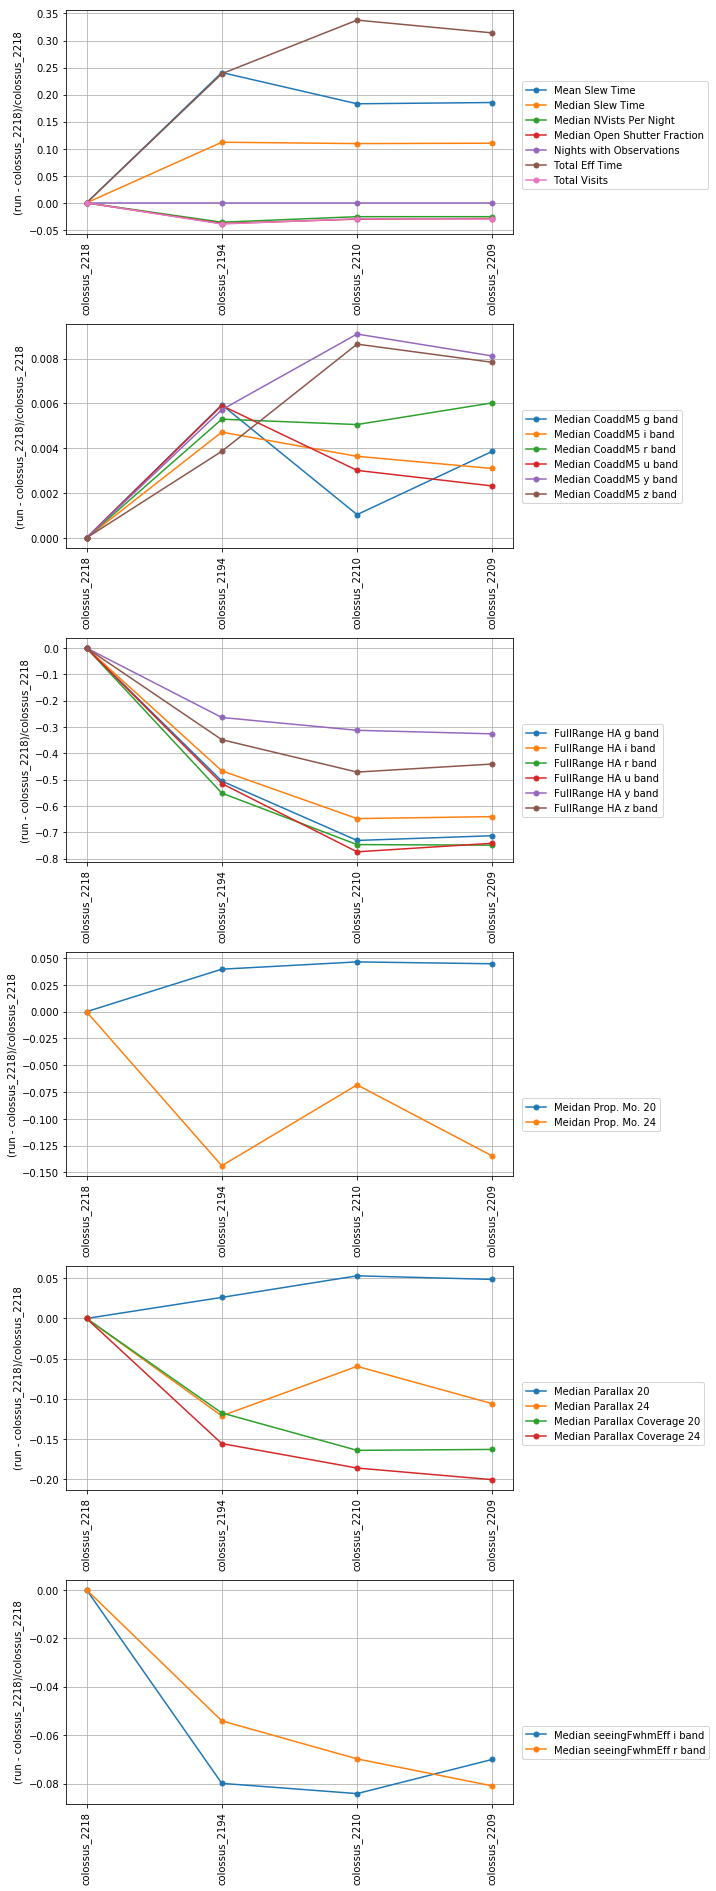

In [13]:
comp.normalizedCompPlot()

# Overplotting

OpsimFiledSlicer

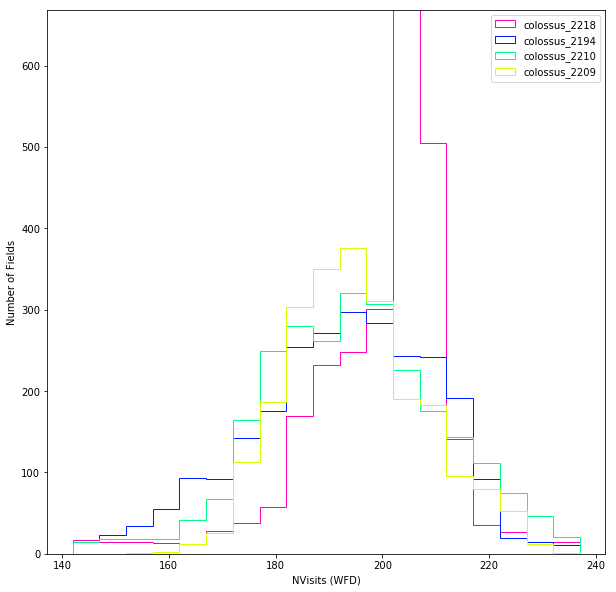

In [14]:
plt.figure(figsize=(10,10))
test = mafMultiRunPlots.overplotOneDHistograms(dataframe=rundf,
                                               slicerAbrv='OPSI',
                                               outDirs=['/sched/']*len(rundf.index),
                                               metricName='NVisits_All_filters', 
                                               metadata='WFD',
                                               opsim=False,normalize=False,
                                               logScale=False)
plt.legend()

OneDSlicer

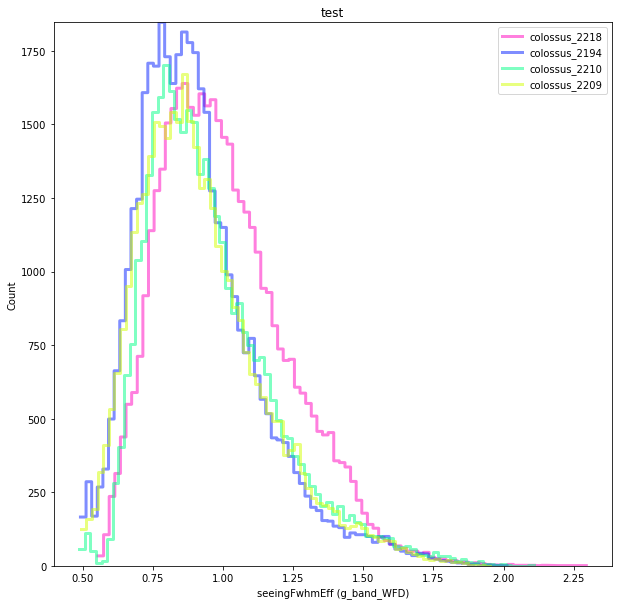

In [15]:
plt.figure(figsize=(10,10))
test = mafMultiRunPlots.overplotOneDHistograms(dataframe=rundf,
                                               slicerAbrv='ONED',
                                               outDirs=['/sched/']*len(rundf.index),
                                               metricName='Seeing_Histogram', 
                                               metadata='g_band_WFD',
                                               opsim=False,normalize=False,
                                               logScale=False)
plt.title('test')
plt.legend()

HealPixSlicer

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


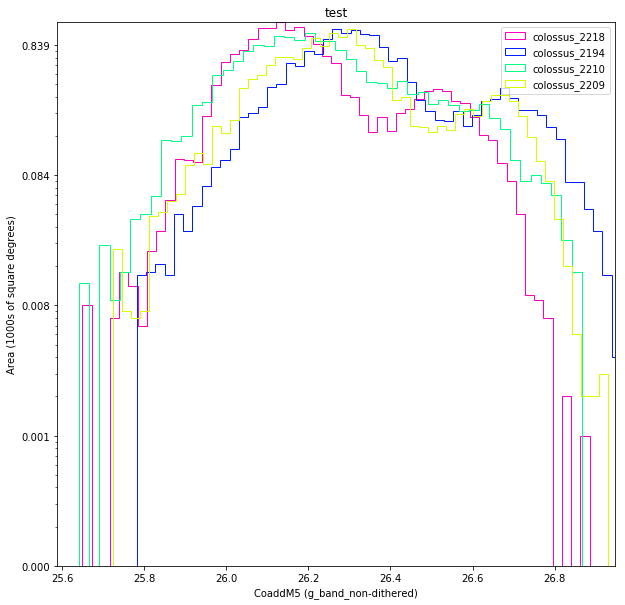

In [16]:
plt.figure(figsize=(10,10))
test = mafMultiRunPlots.overplotOneDHistograms(dataframe=rundf,
                                               slicerAbrv='HEAL',
                                               outDirs=['/sci/']*len(rundf.index),
                                               metricName='db_CoaddM5', 
                                               metadata='g_band_non-dithered',
                                               opsim=False,normalize=False,
                                               logScale=True)
plt.title('test')
plt.legend()

# Skymap subplots

Using dataframe

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


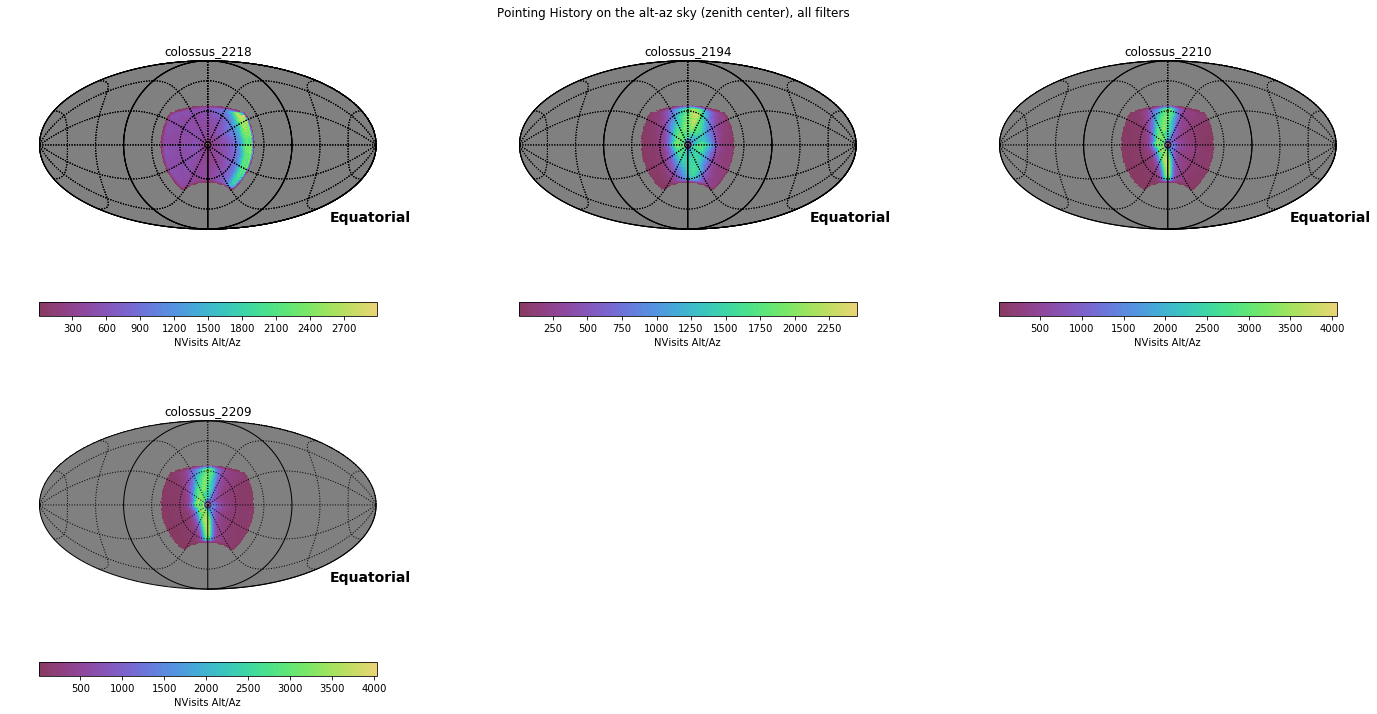

In [17]:
mafMultiRunPlots.subplotSkyMaps(dataframe=rundf,outDirs=['/sched/']*len(rundf.index),
                                metricName='NVisits_Alt_Az',nrows=2,ncols=3,
                                metadata=None,slicerAbrv='HEAL',
                                opsim=False,figsize=(20,10))

## With the `colorbarRun` option you can assign the same colormap levels to all of the plots based on one run.

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/home/docmaf/stack/python/miniconda3-4.2.12/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/docmaf/stack/python/miniconda3-4.2.12/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


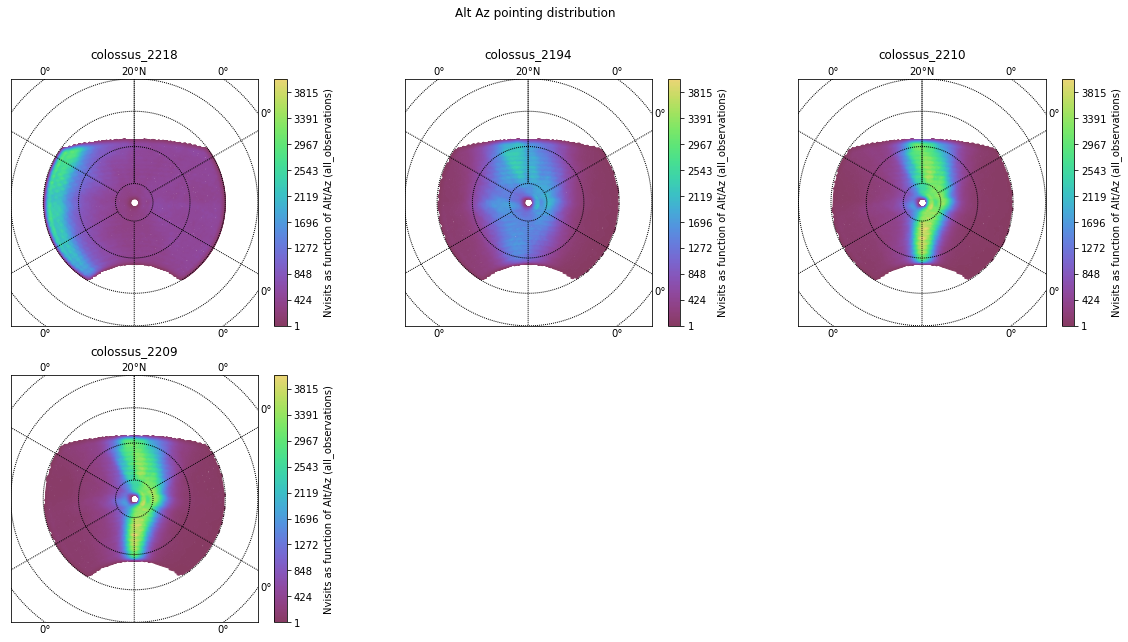

In [18]:
mafMultiRunPlots.subplotSkyMaps(dataframe=rundf,outDirs=['/sci/']*len(rundf.index),
                                metricName='db_Nvisits_as_function_of_Alt_Az',nrows=2,ncols=3,
                                metadata='all_observations',slicerAbrv='HEAL',Lambert=True,
                                opsim=False,figsize=(20,10),colorbarRun='colossus_2218')

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/home/docmaf/stack/python/miniconda3-4.2.12/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/docmaf/stack/python/miniconda3-4.2.12/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


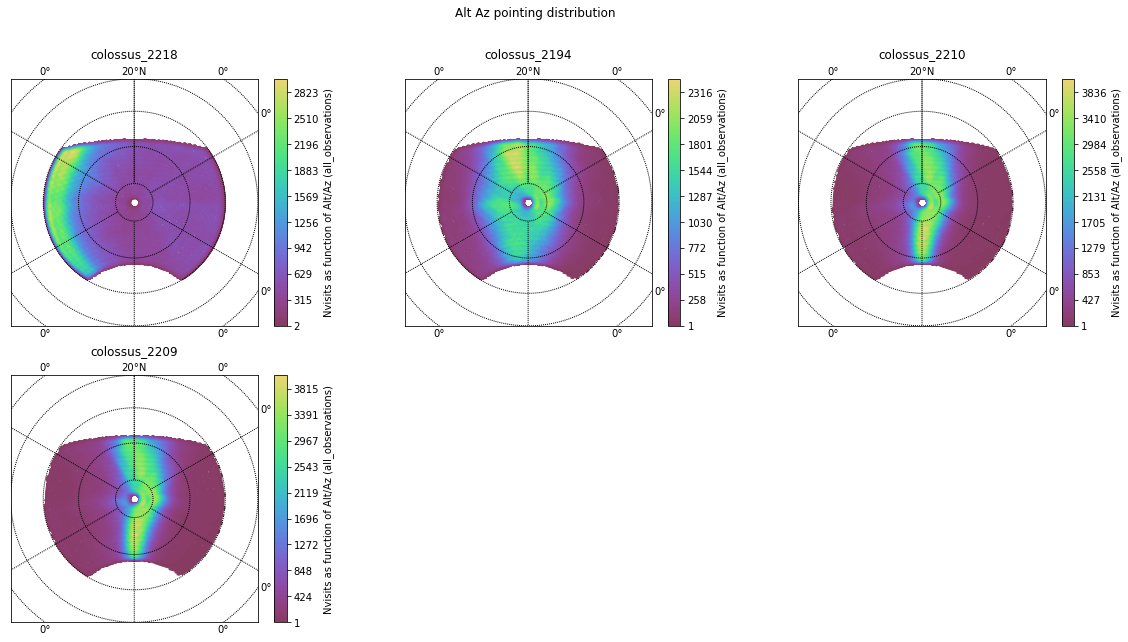

In [19]:
mafMultiRunPlots.subplotSkyMaps(dataframe=rundf,outDirs=['/sci/']*len(rundf.index),
                                metricName='db_Nvisits_as_function_of_Alt_Az',nrows=2,ncols=3,
                                metadata='all_observations',slicerAbrv='HEAL',Lambert=True,
                                opsim=False,figsize=(20,10))

# Using lists

In [20]:
runlist = ['colossus_2210','colossus_2226','colossus_2176','colossus_2176','colossus_2176','colossus_2176']
outDirs = ['/sched/','/sched/','/split/','/midtwo/','/lasttwo/','/sched/']
labelList = ['colossus_2210 0.0 0.5','colossus_2226 0.0 0.5 (reduced visits)',
             'colossus_2176 0.0 0.5 (1st 2yrs)',
             'colossus_2176 0.0 0.5 (mid 2yrs)',
             'colossus_2176 0.0 0.5 (last 2yrs)',
             'colossus_2176 0.0 0.5 (full)']

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


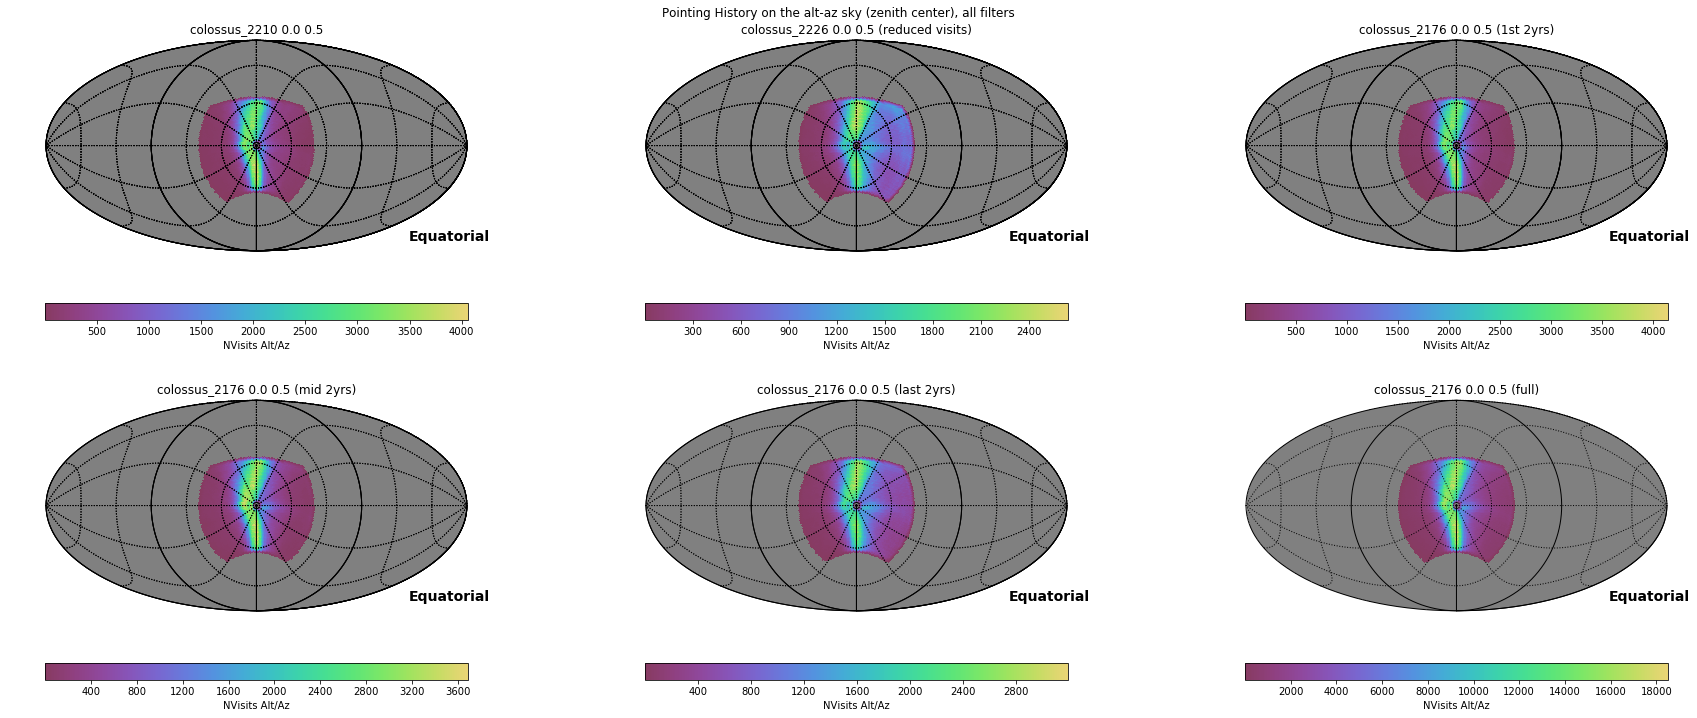

In [21]:
mafMultiRunPlots.subplotSkyMaps(runList=runlist,outDirs=outDirs,metricName='NVisits_Alt_Az',nrows=2,ncols=3,
                                metadata=None,titleList=labelList,slicerAbrv='HEAL',
                                opsim=False,figsize=(25,10))

/home/docmaf/lsst_repos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:523: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(plotDict['bgcolor'])


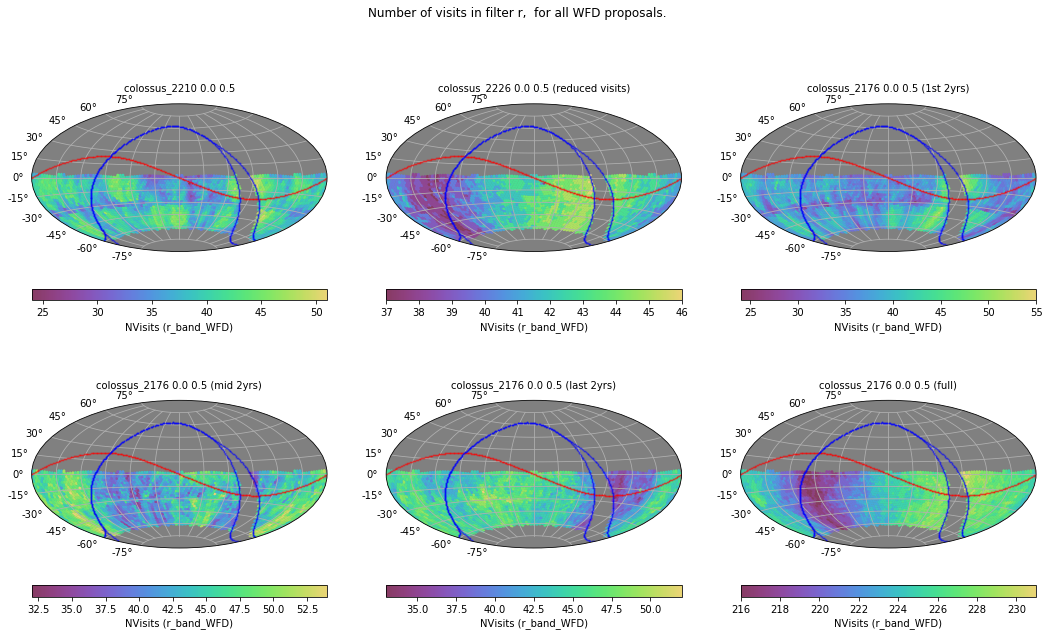

In [22]:
mafMultiRunPlots.subplotSkyMaps(runList = runlist,outDirs = outDirs,metricName='NVisits',nrows=2,ncols=3,
               metadata='r_band_WFD',slicerAbrv='OPSI',opsim=False,
               figsize=(18,10),titleList=labelList)